In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')
df['Age'] = imputer.fit_transform(df[['Age']]).ravel()        # flatten to 1D
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).ravel()

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
#  Training

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Accuracy Comparison
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"KNN Accuracy: {acc_knn:.4f}")


Logistic Regression Accuracy: 0.7989
Decision Tree Accuracy: 0.7654
KNN Accuracy: 0.8045


In [13]:
# Confusion Matrix & Classification Report

# Logistic Regression
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree
print("=== Decision Tree ===")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# KNN
print("=== KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

=== Decision Tree ===
[[82 23]
 [19 55]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

=== KNN ===
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro 

Best Model: KNN with Accuracy: 0.8045


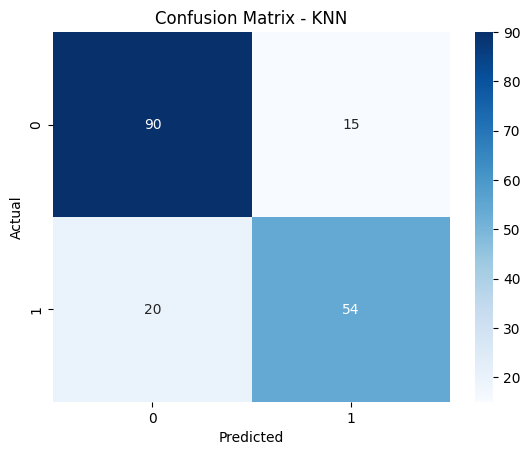

In [14]:
# Identify Best Model
accuracies = {
    'Logistic Regression': acc_lr,
    'Decision Tree': acc_dt,
    'KNN': acc_knn
}

best_model_name = max(accuracies, key=accuracies.get)
best_model_pred = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn
}[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.4f}")

cm = confusion_matrix(y_test, best_model_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

